In [148]:
!pip install torchmetrics

In [149]:
import torch
import copy
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader , TensorDataset
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import scipy.stats as stats
from torchmetrics.functional import pearson_corrcoef

In [177]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url,sep=';')
data_cop= copy.copy(data)

In [151]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [152]:
data['residual sugar'][(data['residual sugar']>10)] = np.nan
data = data.dropna()

<ipython-input-152-2fff4bfc8d19>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['residual sugar'][(data['residual sugar']>10)] = np.nan
<ipython-input-152-2fff4bfc8d19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy

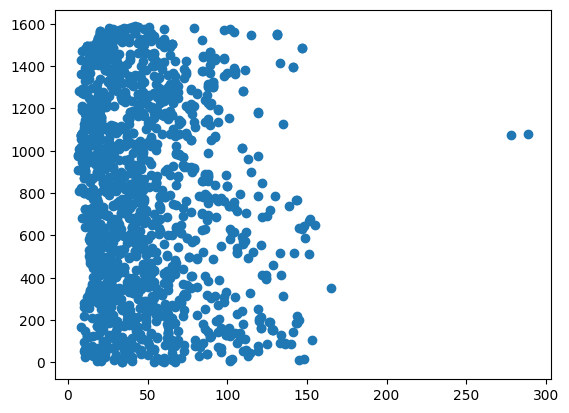

In [153]:
x = data['total sulfur dioxide']

plt.scatter(x,range(len(data)))
plt.show()

data['total sulfur dioxide'][data['total sulfur dioxide'] >200] = np.nan
data = data.dropna()
#  normalize the data cnig
data0 =data.drop(columns='residual sugar').apply(stats.zscore)
data0['residual sugar'] = data['residual sugar']
data = data0.astype(float)

In [173]:
# s = np.random.randint(1,len(data),size = (10))
test_data = data.iloc[s]
data.drop(test_data.index,axis = 0)


,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,residual sugar
0,-0.527578,0.956087,-1.388728,-0.241214,-0.462986,-0.376356,0.582003,1.283823,-0.579191,-0.966039,-0.786496,1.9
1,-0.297657,1.960701,-1.388728,0.228820,0.910630,0.666624,0.040938,-0.726382,0.127331,-0.589696,-0.786496,2.6
2,-0.297657,1.290958,-1.182851,0.100629,-0.070524,0.255753,0.149151,-0.337310,-0.049299,-0.589696,-0.786496,2.3
3,1.656669,-1.388013,1.493548,-0.262579,0.125707,0.445386,0.690216,-0.985764,-0.461437,-0.589696,0.452216,1.9
4,-0.527578,0.956087,-1.388728,-0.241214,-0.462986,-0.376356,0.582003,1.283823,-0.579191,-0.966039,-0.786496,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217340,0.397968,-0.976974,0.057899,1.597439,-0.060301,-0.987085,0.894751,-0.461437,0.068903,-0.786496,2.0
1595,-1.389781,0.118908,-0.874035,-0.540326,2.284247,0.160937,-0.868051,1.348668,0.598346,0.727503,0.452216,2.2
1596,-1.159860,-0.104339,-0.719628,-0.241214,1.303092,-0.186723,-0.532591,0.700215,0.539469,0.539332,0.452216,2.3
1597,-1.389781,0.649121,-0.771097,-0.262579,1.597439,-0.060301,-0.678678,1.672895,0.303962,-0.213354,-0.786496,2.0


In [174]:
data_cop.iloc[test_data.index,3] = np.nan


In [156]:
labels = data['residual sugar']
data1 = data.drop(columns ='residual sugar',errors = 'ignore')

test_data1 = test_data.drop(columns ='residual sugar',errors = 'ignore')
labels_test = test_data['residual sugar']


labelsT = torch.tensor(labels.values,dtype = torch.float)
labels_testT = torch.tensor(labels_test.values,dtype = torch.float)

dataT = torch.tensor(data1.values,dtype = torch.float)
data_testT = torch.tensor(test_data1.values,dtype = torch.float)


In [311]:
dataset_train = TensorDataset(dataT,labelsT)

dataset_test = TensorDataset(data_testT,labels_testT)
data_loader = DataLoader(dataset_train,batch_size=8 ,drop_last=True , shuffle= True)
data_test_lod = DataLoader(dataset_test,batch_size=2 , shuffle= True)

In [312]:
def correlate(yq, yhat):
    # Преобразование в плоские тензоры
    y = yq.flatten()
    x = yhat.flatten()

    sum_yx = torch.sum(x*y)
    sum_y = torch.sum(y)
    sum_x2 = torch.sum(x**2)
    sum_y2 = torch.sum(y**2)
    sum_x = torch.sum(x)

    n = len(y)

    upsters = n*sum_yx - sum_x * sum_y
    print(upsters)
    downsters = torch.sqrt((n * sum_x2 - sum_x**2) * (n * sum_y2 - sum_y**2))

    # Корреляционный коэффициент
    corr_coef = upsters/downsters
    return corr_coef

In [331]:
def thenet(opt,lr):
  class Winenet(nn.Module):
    def __init__(self):
      super().__init__()
      self.input = nn.Linear(11,128)

      self.hd1 = nn.Linear(128,64)

      self.hd2= nn.Linear(64,32)

      self.hd3 = nn.Linear(32,11)

      self.output = nn.Linear(11,1)


    def forward(self,x):
      x = F.leaky_relu(self.input(x))

      x = F.relu(self.hd1(x))

      x = F.relu(self.hd2(x))

      x = F.relu(self.hd3(x))

      x = F.relu(self.output(x))

      return x
  net = Winenet()
  optimaatt = getattr(torch.optim,opt)

  optimazer = optimaatt(net.parameters(),lr =lr)

  lossfan = nn.MSELoss()
  return lossfan,optimazer,net

In [332]:
lossfan,optimazer,net = thenet('Adam',1)
X,y = next(iter(dataset_train))
yhat = net(X)
lossfan(yhat,y)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(3.6100, grad_fn=<MseLossBackward0>)

In [354]:
def createFFN(lr,opt):
  lossfan,optimazer,net = thenet(opt,lr)
  numepoches = 100
  trainAcc = [0]*numepoches
  testAcc = [0]*numepoches
  losses = []

  c = 0

  for epoch in range(numepoches):
    batchac =[]
    net.train()
    for X,y in  data_loader:
      yhat = net(X)

      loss = lossfan(yhat,y)

      losses.append(loss.item())

      #  training
      optimazer.zero_grad()
      loss.backward()
      optimazer.step()

      batchac.append( correlate(y,yhat))
      if c <10:
        print(yhat,'\n',correlate(y,yhat))
        c+=1
    trainAcc[epoch] =   torch.mean(torch.tensor(batchac))
    net.eval()



    if epoch == numepoches-1:
      comparebools= []
      yhats = []
      ylod = []
      with torch.no_grad() :
        for X,y in dataset_test:
          yhats.append(net(X))
          ylod.append(y)

      testAcc[epoch]  = torch.mean(torch.tensor(correlate(y,yhat)))





  return losses,trainAcc,testAcc, comparebools

In [355]:
losses,trainAcc,testAcc,yhat  = createFFN(0.005,'Adam')

Выходные данные были обрезаны до нескольких последних строк (5000).
tensor(-0.1176, grad_fn=<SubBackward0>)
tensor(0.5312, grad_fn=<SubBackward0>)
tensor(7.2057, grad_fn=<SubBackward0>)
tensor(13.3647, grad_fn=<SubBackward0>)
tensor(0.6948, grad_fn=<SubBackward0>)
tensor(7.9367, grad_fn=<SubBackward0>)
tensor(12.4343, grad_fn=<SubBackward0>)
tensor(-0.0042, grad_fn=<SubBackward0>)
tensor(0.4307, grad_fn=<SubBackward0>)
tensor(16.9342, grad_fn=<SubBackward0>)
tensor(6.5473, grad_fn=<SubBackward0>)
tensor(0.2162, grad_fn=<SubBackward0>)
tensor(38.8018, grad_fn=<SubBackward0>)
tensor(23.9650, grad_fn=<SubBackward0>)
tensor(16.0144, grad_fn=<SubBackward0>)
tensor(0.3693, grad_fn=<SubBackward0>)
tensor(0.5940, grad_fn=<SubBackward0>)
tensor(3.0518e-05, grad_fn=<SubBackward0>)
tensor(0.8026, grad_fn=<SubBackward0>)
tensor(31.8271, grad_fn=<SubBackward0>)
tensor(1.9135, grad_fn=<SubBackward0>)
tensor(0.2421, grad_fn=<SubBackward0>)
tensor(8.1052, grad_fn=<SubBackward0>)
tensor(36.0773, grad_f

<ipython-input-354-9b5df3cfe28d>:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  testAcc[epoch]  = torch.mean(torch.tensor(correlate(y,yhat)))


<ipython-input-362-7b1f93630c43>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.plot(torch.tensor(test1D).detach().numpy())
<ipython-input-362-7b1f93630c43>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.plot(torch.tensor(train1D).detach().numpy())


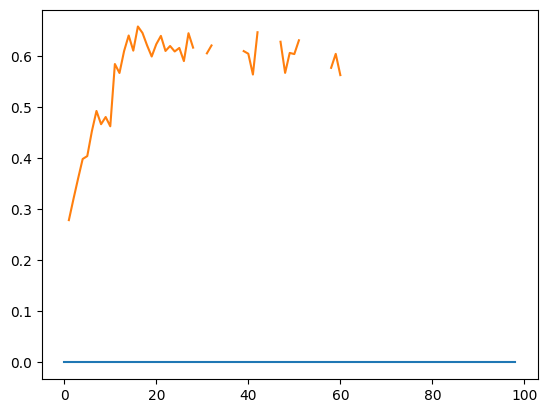

In [362]:
test1D = torch.tensor(testAcc).flatten()
plt.plot(torch.tensor(test1D).detach().numpy())
train1D =torch.tensor(trainAcc).flatten()
plt.plot(torch.tensor(train1D).detach().numpy())

In [345]:
train1D

tensor([0.0562, 0.1545, 0.2064, 0.2331, 0.2677, 0.2950, 0.3244, 0.3484, 0.3751,
        0.3978])

In [ ]:
y= torch.tensor([1,2,3,4,5,6,7,8,9]).float()
u = torch.tensor([2,4,8,16,32,64,128,256,30040223857]).float()
correlate(y,u)

In [176]:
yhat_np = torch.detach(torch.tensor(yhat)).numpy()
yhat_np
indexes = data_cop[data_cop['residual sugar'].isna()].index
for i ,mod_x in    enumerate(yhat_np):
  data_cop.iloc[indexes[i],3] = mod_x

# data_cop.loc[indexes,'residual sugar'].loc[indexes[0],'residual sugar'] = 12
data_cop.loc[indexes,'residual sugar']

,residual sugar
12,5.040430
56,1.972726
288,2.302774
300,1.972726
360,2.499375
534,3.262035
556,3.302376
831,2.252997
1299,1.972726
1557,3.017571


In [ ]:
yhat_np

In [ ]:
indexes

In [189]:
x = data.loc[indexes,'residual sugar'] .values
c = data_cop.loc[indexes,'residual sugar'].values

In [195]:
print(c)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [357]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
